# Analysing data from weights and biases

## Import relevant tools

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
# set up plotting settings.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [3]:
import numpy as np
from src.wandb_utils import metric_conv_data
from src.models.poly import fit
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp

## Collecting data from wandb

Collect all the required data from a particular run with other paramters controlled.

In [4]:
mem_dict = {}
for mem in ["EEEE", "EECE", "EEEC", "EECC"]:
    metric_d, _ = metric_conv_data(
        metric_name="trend_nino3.4",
        prefix="k_days_10_eps_days",
        ex_list=["ingrid_True"],
        control_variable_list=[
            (("atm", "k_days"), 10),
            # (("coup", "c_d"), 2.25e-3),
            (("atm", "e_frac"), 0.5),
            (("atm", "eps_days"), 0.75),
            (("atm", "mem"), mem),
            (("atm", "vary_cloud_const"), True),
        ],
        index_by=("coup", "c_d"),
    )
    mem_dict[mem] = [[], []]
    for val in metric_d:
        mem_dict[mem][0].append(float(val))
        mem_dict[mem][1].append(float(metric_d[val][5, 1]))

k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00025_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.002_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.001_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.003_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.002_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00125_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00175_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.0015_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.0025_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00025_vary_cloud_const_True_EECE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0_vary_cloud_const_True_EECE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00075_vary_cloud_co

## Plot data from wandb

param EEEE [-20.01127415639631+/-0.605798369381671
 0.4810086265055368+/-0.001087909985178536]
param EECE [-19.664065317776124+/-0.6014229809489599
 0.5366611332943885+/-0.0010387315828538726]
param EEEC [-6.258569960543675+/-0.9998655685643177
 0.7959540076231921+/-0.001718648144296277]
param EECC [6.530101974397601+/-0.7340304753418364
 0.9315313394718199+/-0.001297594806424033]


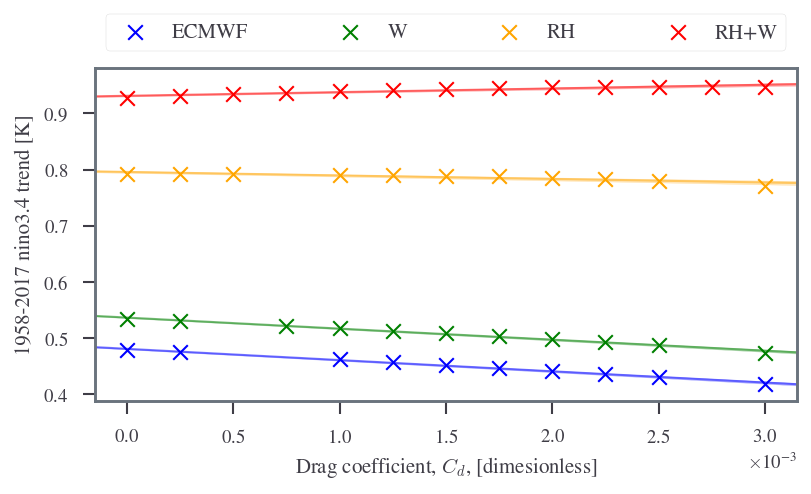

In [5]:
color_d = {
    "EEEE": "blue",
    "EECE": "green",
    "EEEC": "orange",
    "EECC": "red",
}

name_d = {
    "EEEE": "ECMWF",
    "EECE": "W",
    "EEEC": "RH",
    "EECC": "RH+W",
}
min_x = np.inf
max_x = -np.inf

for mem in name_d:
    if min(mem_dict[mem][0]) < min_x:
        min_x = min(mem_dict[mem][0])
    if max(mem_dict[mem][0]) > max_x:
        max_x = max(mem_dict[mem][0])

ext = 0.05
min_x_pred = min_x - (max_x - min_x) * ext
max_x_pred = max_x + (max_x - min_x) * ext
x_pred = np.linspace(min_x_pred, max_x_pred, num=50)

for mem in name_d:
    param, func = fit(mem_dict[mem][0], mem_dict[mem][1], reg_type="lin")
    print("param", mem, param)
    y_pred = func(x_pred)
    y_pred_n = unp.nominal_values(y_pred)
    y_pred_s = unp.std_devs(y_pred)
    plt.fill_between(
        x_pred,
        y_pred_n + y_pred_s,
        y_pred_n - y_pred_s,
        alpha=0.25,
        color=color_d[mem],
    )
    plt.plot(x_pred, y_pred_n, color=color_d[mem], alpha=0.5)
    plt.scatter(
        mem_dict[mem][0],
        mem_dict[mem][1],
        marker="x",
        label=name_d[mem],
        c=color_d[mem],
    )

plt.xlabel("Drag coefficient, $C_d$, [dimesionless]")
plt.ylabel("1958-2017 nino3.4 trend [K]")
plt.legend(
    bbox_to_anchor=(0.0, 1.02, 1, 0.102),
    loc="lower left",
    mode="expand",
    ncol=4,
)
plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0, 0), useMathText=True)

plt.xlim(min_x_pred, max_x_pred)
plt.tight_layout()

In [6]:
_[0].cfg["oc"].nummode

2

In [7]:
_[0.00225].cfg["oc"].nummode

2

## Arrow plots

In [8]:
mem_dict = {}
for mem in ["EEEE", "EECE", "EEEC", "EECC"]:
    metric_d = {}
    for vary_cloud_const in [True, False]:
        for e_frac in [0.5, 2]:
            metric_d_loc, _ = metric_conv_data(
                metric_name="trend_nino3.4",
                prefix="",
                ex_list=["ingrid_True"],
                control_variable_list=[
                    (("atm", "k_days"), 10),
                    (("coup", "c_d"), 2.25e-3),
                    (("atm", "e_frac"), e_frac),
                    (("atm", "eps_days"), 0.75),
                    (("atm", "mem"), mem),
                    (("atm", "vary_cloud_const"), vary_cloud_const),
                ],
                index_by=("name"),
            )
            metric_d = {**metric_d_loc, **metric_d}

    mem_dict[mem] = [[], []]
    for val in metric_d:
        mem_dict[mem][0].append(val)
        mem_dict[mem][1].append(float(metric_d[val][5, 1]))

test25
test24
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_EEEE
N_ECMWF_coup
ECMWF_coup
E2_ECMWF_coup
E_ECMWF_coup
A_ECMWF_coup
AE_ECMWF_coup
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_EECE
N_C_W2_coup
N_C_W_coup
C_W_coup
E2_C_W_coup
E_C_W_coup
A_C_W2_coup
A_C_W_coup
AE_C_W_coup
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_EEEC
N_C_RH_coup
C_RH_coup
E2_C_RH_coup
E_C_RH_coup
A_C_RH_coup
AE_C_RH_coup
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_EECC
N_C_RH_W2_coup
N_C_RH_W_coup
C_RH_W_coup
E2_C_RH_W_coup
E_C_RH_W_coup
A_C_RH_W2_coup
A_C_RH_W_coup
AE_C_RH_W_coup


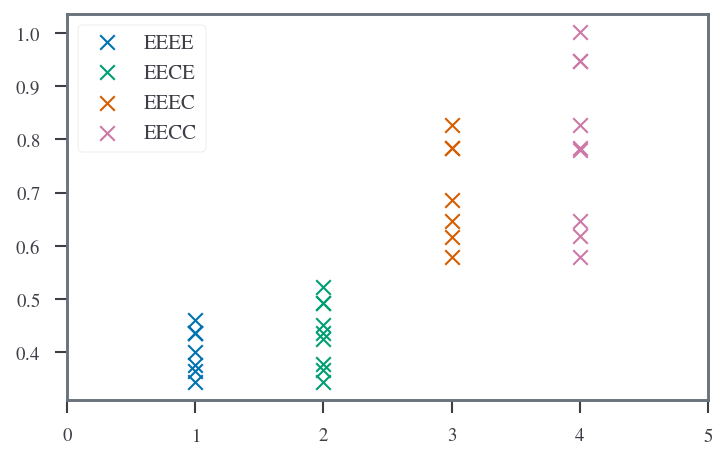

In [9]:
i = 1
for mem in mem_dict:
    #print([i for _ in mem_dict[mem][1]], mem_dict[mem][1])
    plt.scatter([i for _ in mem_dict[mem][1]], mem_dict[mem][1], label=mem)
    i += 1
    
plt.xlim(0, i)
plt.legend()

In [10]:
metric_d

{'AE_C_RH_W_coup': array([[0.        , 0.55993331],
        [1.        , 0.46083996],
        [2.        , 0.74789722],
        [3.        , 0.77034592],
        [4.        , 0.82005772],
        [5.        , 0.82740342]]),
 'A_C_RH_W2_coup': array([[0.        , 0.55993331],
        [1.        , 0.40156689],
        [2.        , 0.71137339],
        [3.        , 0.72161181],
        [4.        , 0.77504443],
        [5.        , 0.78024562]]),
 'A_C_RH_W_coup': array([[0.        , 0.55993331],
        [1.        , 0.35873489],
        [2.        , 0.63544161],
        [3.        , 0.60192197],
        [4.        , 0.65120501],
        [5.        , 0.6474647 ]]),
 'E2_C_RH_W_coup': array([[0.        , 0.55993331],
        [1.        , 0.52378907],
        [2.        , 0.81098679],
        [3.        , 0.92877046],
        [4.        , 0.97999571],
        [5.        , 1.00194651]]),
 'E_C_RH_W_coup': array([[0.        , 0.55993331],
        [1.        , 0.35293816],
        [2.        ,

test25
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_EEEE
N_ECMWF_coup
ECMWF_coup
E2_ECMWF_coup
E_ECMWF_coup
A_ECMWF_coup
AE_ECMWF_coup
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_EEE6
k_days_10_eps_days_0.75_e_frac_2_c_d_0.00225_vary_cloud_const_True_EEE6
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_False_EEE6
k_days_10_eps_days_0.75_e_frac_2_c_d_0.00225_vary_cloud_const_False_EEE6
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_6E6E
k_days_10_eps_days_0.75_e_frac_2_c_d_0.00225_vary_cloud_const_True_6E6E
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_False_6E6E
k_days_10_eps_days_0.75_e_frac_2_c_d_0.00225_vary_cloud_const_False_6E6E
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_E66E
k_days_10_eps_days_0.75_e_frac_2_c_d_0.00225_vary_cloud_const_True_E66E
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_False_E66E
k_days_10_eps_days_0.75_e_frac_2

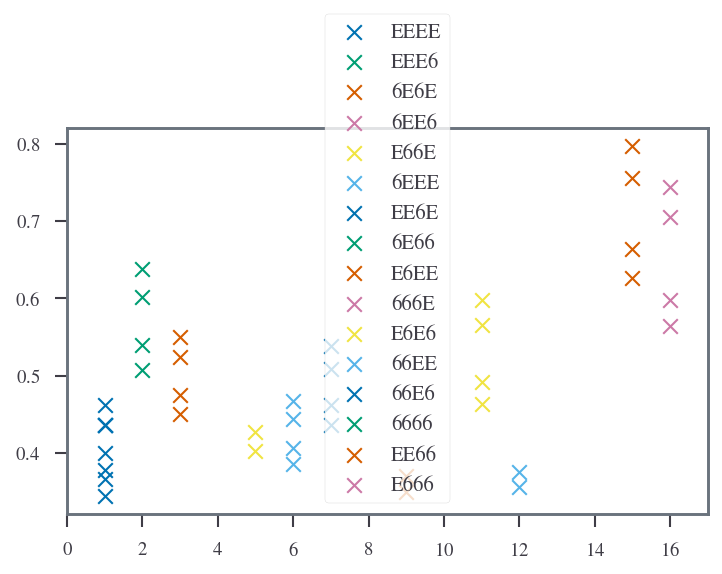

In [35]:
from src.search import variable_combinations
variable_combinations(vary=[True, True, True, True], exps=["6"])
mem_dict = {}
for mem in variable_combinations(vary=[True, True, True, True], exps=["6"]): 
    #["EEEE", "6EEE", "E6EE", "EE6E", "E66E", "EEE6", "EE66", "E666", "6666"]:
    metric_d = {}
    for vary_cloud_const in [True, False]:
        for e_frac in [0.5, 2]:
            metric_d_loc, _ = metric_conv_data(
                metric_name="trend_nino3.4",
                prefix="",
                ex_list=["ingrid_True"],
                control_variable_list=[
                    (("atm", "k_days"), 10),
                    (("coup", "c_d"), 2.25e-3),
                    (("atm", "e_frac"), e_frac),
                    (("atm", "eps_days"), 0.75),
                    (("atm", "mem"), mem),
                    (("atm", "vary_cloud_const"), vary_cloud_const),
                ],
                index_by=("name"),
            )
            metric_d = {**metric_d_loc, **metric_d}

    mem_dict[mem] = [[], []]
    for val in metric_d:
        mem_dict[mem][0].append(val)
        mem_dict[mem][1].append(float(metric_d[val][5, 1]))

i = 1
for mem in mem_dict:
    #print([i for _ in mem_dict[mem][1]], mem_dict[mem][1])
    plt.scatter([i for _ in mem_dict[mem][1]], mem_dict[mem][1], label=mem)
    i += 1
    
plt.xlim(0, i)
plt.legend()

(0.0, 12.0)

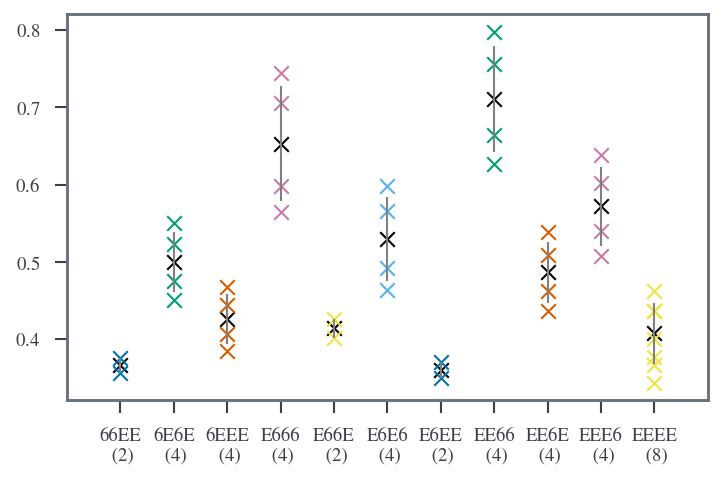

In [51]:
i = 1
xticks = []
xticklabels = []
mem_keys = sorted(mem_dict.keys())
for mem in mem_keys:
    # print([i for _ in mem_dict[mem][1]], mem_dict[mem][1])
    if len(mem_dict[mem][1]) != 0:
        plt.scatter(i, np.mean(mem_dict[mem][1]), color="black")
        plt.errorbar(
            i,
            np.mean(mem_dict[mem][1]),
            capsize=3,
            ecolor="grey",
            fmt="+",
            color="black",
            yerr=np.std(mem_dict[mem][1]),
        )
        plt.scatter([i for _ in mem_dict[mem][1]], mem_dict[mem][1], label=mem)
        xticks.append(i)
        xticklabels.append(mem + "\n (" + str(len(mem_dict[mem][1])) + ")")
        i += 1

plt.xticks(xticks, xticklabels)
plt.xlim(0, i)
# plt.legend()

In [40]:
mem_dict.keys()

dict_keys(['EEEE', 'EEE6', '6E6E', '6EE6', 'E66E', '6EEE', 'EE6E', '6E66', 'E6EE', '666E', 'E6E6', '66EE', '66E6', '6666', 'EE66', 'E666'])

In [48]:
mem_keys = sorted(mem_dict.keys())
mem_keys.reverse()

In [88]:
from src.models.model_setup import mems_to_df
df = mems_to_df(mem_keys)

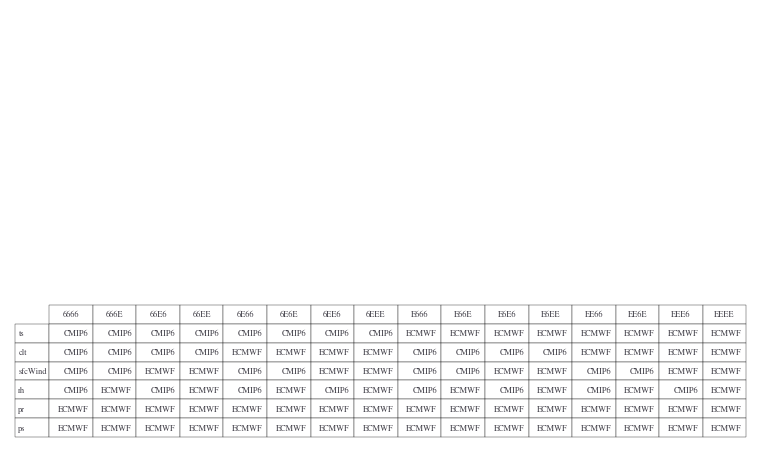

In [100]:
fig, ax = plt.subplots()
pd.plotting.table(ax,df.transpose())
plt.xticks([])
plt.yticks([])
# Hide grid lines
ax.grid(False)
plt.axis('off')
plt.tight_layout()


In [52]:
mem_keys

['6666',
 '666E',
 '66E6',
 '66EE',
 '6E66',
 '6E6E',
 '6EE6',
 '6EEE',
 'E666',
 'E66E',
 'E6E6',
 'E6EE',
 'EE66',
 'EE6E',
 'EEE6',
 'EEEE']

In [60]:
from src.constants import MODEL_NAMES, VAR_DICT
def mem_to_summary(mem:str) -> dict: 
    result_d = {}
    for i, value in enumerate(mem):
        print(i, VAR_DICT[i], MODEL_NAMES[value])
        result_d[VAR_DICT[i]] = MODEL_NAMES[value]
    return result_d
mem_to_summary("EEEE")
mem_to_summary("EEE6")
mem_to_summary("6EEC")

0 ts ECMWF
1 clt ECMWF
2 sfcWind ECMWF
3 rh ECMWF
0 ts ECMWF
1 clt ECMWF
2 sfcWind ECMWF
3 rh CMIP6
0 ts CMIP6
1 clt ECMWF
2 sfcWind ECMWF
3 rh CMIP5


{'ts': 'CMIP6', 'clt': 'ECMWF', 'sfcWind': 'ECMWF', 'rh': 'CMIP5'}